# Lecture 2: The Wave Equation
Audio Processing, MED4, Aalborg University, 2019

By Jesper Kjær Nielsen (jkn@create.aau.dk), Audio Analysis Lab, Aalborg University.

Last edited: 2019-01-31

## The Taylor series
In the next 20 minutes, you will learn
- What the Taylor series is
- How the Taylor series can be used to **approximate functions** such as $\cos(x)$ with a **polynomial**

### Introduction to the Taylor series
A computer (e.g., a calculator) can basically only do two things:
1. Add (binary) numbers
2. Move numbers around

So how can a computer calculate, e.g., $3\cdot 4$, $2\cdot3^2$, or $\cos(x)$?

Multiplications (more generally computing polynomials) are rather easy since
\begin{align}
    3\cdot 4 &= 4+4+4 = 3+3+3+3 = 12\\
    2\cdot 3^2 &= 2\cdot3\cdot3 = (3+3+3)+(3+3+3) = 18
\end{align}
which can be implemented using, e.g., for loops.

But what about $\cos(x)$?

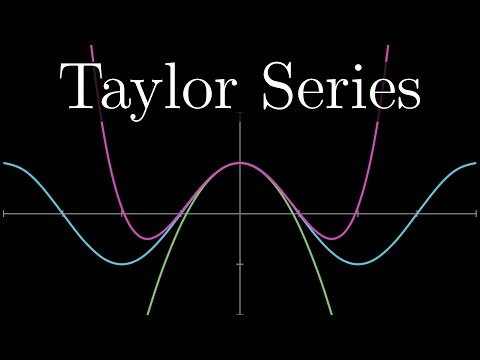

In [2]:
from IPython.display import display, YouTubeVideo, Image
YouTubeVideo('3d6DsjIBzJ4')

A **Taylor series** of a function $f(x)$ at a point $a$ is
\begin{align}
    f(x) &= f(a)+\frac{f'(a)}{1}(x-a)+\frac{f''(a)}{2\cdot 1}(x-a)^2+\frac{f^{(3)}(a)}{3\cdot 2\cdot 1}(x-a)^3+\frac{f^{(4)}(a)}{4\cdot 3\cdot 2\cdot 1}(x-a)^4+\cdots\\
         &= \sum_{n=0}^{\infty} \frac{f^{(n)}(a)}{n!}(x-a)^n
\end{align}
where $n!=n(n-1)(n-2)\cdots3\cdot2\cdot1$ and
$$
    f^{(n)}(a) = \frac{d^nf(x)}{dx^n}\bigg|_{x=a}
$$
is the $n$'th derivative of $f(x)$ evaluated at $a$.

An $N$'th order **Taylor approximation** to a function $f(x)$ at a point $a$ is
$$
    f(x) \approx \sum_{n=0}^{N} \frac{f^{(n)}(a)}{n!}(x-a)^n\ .
$$
Thus, only the first $N$ terms in the **Taylor series** is used.

### Example: 2nd-order Taylor approximation to $\cos(x)$
We wish to make a 2nd-order Taylor approximation to the function $f(x)=\cos(x)$ at $a=0$. For the derivatives, we have
\begin{align}
    f'(0) &= -\sin(0) = 0\\
    f''(0) &= -\cos(0) = -1\ .
\end{align}
Thus, the 2nd-order Taylor approximation is
\begin{align}
    f(x) &= \cos(x) \approx f(0) + f'(0)(x-0) + \frac{f''(0)}{2}(x-0)^2\\
        &= 1 -x^2/2\ .
\end{align}

#### Example: Taylor series of $\cos(x)$
By applying the above principles, we can show that the **Taylor series** of $\cos(x)$ at $a=0$ is
\begin{align}
    \cos(x) &= 1 - x^2/2 + x^4/24 -x^6/720 + \cdots\\
    &= \sum_{m=0}^\infty \frac{(-1)^m}{(2m)!}x^{2m}\ .
\end{align}

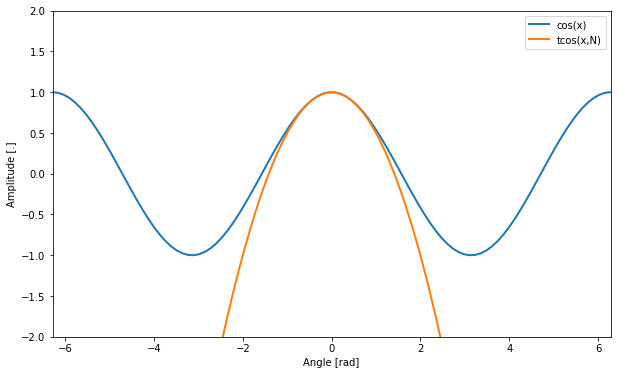

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

def tcos(angles, approxOrder):
    '''Compute the approxOrder Taylor approximation to cos(angles) at a=0'''
    # first compute the approximation for an order 0
    cosApprox = np.ones((np.shape(angles)))
    # iteratively compute the approximation for higher orders
    if approxOrder > 0:
        for m in np.arange(np.floor(approxOrder/2))+1:
            cosApprox = cosApprox+(-1)**m*angles**(2*m)/np.math.factorial(2*m)
    return cosApprox

nData = 100
approxOrder = 2
angles = np.pi*np.linspace(-2,2,nData)

# plot the results
plt.figure(figsize=(10,6))
plt.plot(angles, np.cos(angles), linewidth=2, label="cos(x)")
plt.plot(angles, tcos(angles,approxOrder), linewidth=2, label="tcos(x,N)")
plt.legend()
plt.xlim((angles[0],angles[nData-1])), plt.ylim((-2,2))
plt.xlabel('Angle [rad]'), plt.ylabel('Amplitude [.]');

#### Example: Taylor series of $\sin(x)$
By applying the above principles, we can show that the **Taylor series** of $\sin(x)$ at $a=0$ is
\begin{align}
    \sin(x) &= x - x^3/6 + x^5/120 - x^7/5040 + \cdots\\
    &= \sum_{m=0}^\infty \frac{(-1)^m}{(2m+1)!}x^{2m+1}\ .
\end{align}

#### Example: Taylor series of $\mathrm{e}^{jx}$
By applying the above principles, we can show that the **Taylor series** of $\mathrm{e}^{jx}$ at $a=0$ is
\begin{align}
    \mathrm{e}^{jx} &= 1 + jx - x^2/2 - jx^3/6 + x^4/24 + jx^5/120 - x^6/720 - jx^7/5040 + \cdots\\
    &= \sum_{n=0}^\infty \frac{j^n}{n!}x^{n}\ .
\end{align}

Note that is can also be written as
\begin{align}
    \mathrm{e}^{jx} &= (1 - x^2/2 + x^4/24 - x^6/720 + \cdots) + j(x - x^3/6 + x^5/120 - x^7/5040 + \cdots)\\
    &= \cos(x)+j\sin(x)
\end{align}
which is **Euler's formula**!

### Summary
- A Taylor series is a polynomial of infinite order
- A Taylor series of a function $f(x)$ around a point $a$ is given by
$$
    f(x) = \sum_{n=0}^{\infty} \frac{f^{(n)}(a)}{n!}(x-a)^n\ .
$$
- If we only retain the first $N$ terms in the sum, we refer to the Taylor series as a Taylor approximation of order $N$.
- Taylor approximations can be used in computer algorithms to evaluate function values of functions such as $\cos(\theta)$ or $\textrm{e}^x$.

### Active 5 minutes break
Make a 1st-order Taylor approximation to $f(x)=\sin(x)$ at $a$.
- What happens if $a=0$?
- What happens if $a=\pi/2$?

Sketch your result.

---
**Tip:** Use that
\begin{align}
    f(x) &\approx \sum_{n=0}^{N} \frac{f^{(n)}(a)}{n!}(x-a)^n\\
    \frac{d\sin(x)}{dx} &= \cos(x)\ .
\end{align}

## The wave equation
In the next 20 minutes, you will learn
- Which significant forces act on a vibrating string
- How we can model a vibrating string (the 1D Wave equation)

### A vibrating string
Two opposing forces acting on the the string element:
1. String tension $T$ is pulling at the angles $\theta(x)$ and $\theta(x+\Delta x)$ in opposite directions
2. When $\theta(x)\neq\theta(x+\Delta x)$, the string is vibrating with a force $F_y$
<center>
<img src="figures/vibratingString.png" alt="A vibrating string" width="70%"/>
</center>

We start by looking at the **second** force above. From Newton's second law, we have
$$
    F_y = m a \approx \rho\Delta x\frac{\partial^2 y}{\partial t^2}
$$
where
- $m$ is the **mass of the string element** measured in **kg**
- $a$ is the **acceleration of the string element** measured in **m/s${}^2$**

For a string with (linear) density $\rho$ measured in **kg/m**, the mass can also be written as
$$
    m \approx \rho\Delta x\ .
$$

The acceleration can also be written as
$$
    a = \frac{\partial v}{\partial t} = \frac{\partial^2 y}{\partial t^2}
$$
where $v$ is the **speed of the string element** measured in **m/s**.

For the first force, we obtain from the figure below that
\begin{align}
    \Delta T_y &= -T_y(x)+T_y(x+\Delta x)\\
        &= -T\sin(\theta(x))+T\sin(\theta(x+\Delta x))\\
        &= T\left[\sin(\theta(x+\Delta x))-\sin(\theta(x))\right]\ .
\end{align}
<center>
<img src="figures/firstForceWaveEquation.png" alt="A vibrating string - first force" width="70%"/>
</center>




In the limit of $\Delta x\to 0$, the two forces $\Delta T_y$ and $F_y$ **must** be identical, i.e., 
\begin{align}
    \Delta T_y &= T\left[\sin(\theta(x+\Delta x))-\sin(\theta(x))\right]\\
    F_y &= \rho\Delta x\frac{\partial^2 y}{\partial t^2}
\end{align}
are equal for $\Delta x\to 0$.

From this, we get
\begin{align}
    \rho\frac{\partial^2 y}{\partial t^2} &= T\lim_{\Delta x\to 0} \frac{\sin(\theta(x+\Delta x))-\sin(\theta(x))}{\Delta x}\\
    &= T \frac{\partial \sin(\theta(x))}{\partial x}
\end{align}
where the last equality follows from the definition of a derivative, i.e.,
$$
    f'(x) = \lim_{\Delta x\to 0} \frac{f(x+\Delta x)-f(x)}{\Delta x}\ .
$$

For a right-angle triangle, we have
$$
    \sin(\theta(x)) = \frac{\Delta y}{h}\ .
$$

However, when $\theta(x)$ is very small (as for triangle 2), then $h\approx \Delta x$. Thus,
$$
    \sin(\theta(x)) \approx \frac{\Delta y}{\Delta x} \to \frac{\partial y}{\partial x}\quad\text{for }\Delta x\to0\ .
$$

<center>
<img src="figures/rightTrianglesApprox.png" alt="Approximation sin(x)" width="80%"/>
</center>




### The 1D-wave equation
Combining everything so far yields the 1D wave-equation
$$
    \frac{\partial^2 y(x,t)}{\partial x^2} = \frac{1}{c^2} \frac{\partial^2 y(x,t)}{\partial t^2}
$$
where
- $c$ is the **propagation speed** measured in **m/s** and given by
$$
    c = \sqrt{T/\rho}\ .
$$
Note that increasing the string tension $T$ or decreasing the string density both increases the propagation speed.
- we have made it explicit that the string height $y(x,t)$ depends on both time $t$ and position $x$ (This dependency was implicit in the derivation)

### Summary
- For small vibrations, the vibrations on a string approximately satisfy the 1D-wave euations given by
$$
    \frac{\partial^2 y(x,t)}{\partial x^2} = \frac{1}{c^2} \frac{\partial^2 y(x,t)}{\partial t^2}\ .
$$
Note that losses due to, e.g., string stiffness and interactions with the air are ignored in this model.
- The propagation speed $c$ on a string is given by
$$
    c = \sqrt{T/\rho}\ .
$$
where $T$ is the string tension measured in N and $\rho$ is the linear density measured in kg/m.

## Solving the wave equation - part 1
In the next 20 minutes, you will learn
- How to solve the wave equation for two very simple cases
- How these simple cases can be used to derive the general solution to the wave equation
- What initial and boundary conditions are

### Case 1: Infinitely long string excited at $x=0$
We will assume the following:
- the string is infinitely long (extending from 0 to $\infty$)
- we excite the string at $x=0$ with a bump $f(t)$ travelling to the right

<center>
<img src="figures/movingBumpCase1.png" alt="One bump" width="70%" />
</center>

Based on the above assumptions, we would now like to find the $y(x,t)$ which solves the **wave equation**.

Suppose that we are standing $x$ meters away from person (i.e., the boundary at $x=0$) introducing a bump $f(t)$. After $\Delta t = x/c$ seconds, we think that we will observe the same bump where $c=\sqrt{T/\rho}$ is the propagation speed. Therefore, our guess at the solution is
$$
    y(x,t) = f(t-x/c)\ .
$$

Let us check if this satisfies the wave equation. By using the **chain rule** for differentiation, we get
\begin{align}
    \frac{\partial^2 y(x,t)}{\partial t^2} &= f''(t-x/c)\\
    \frac{\partial^2 y(x,t)}{\partial x^2} &= -\frac{\partial}{\partial x}\left[\frac{f'(t-x/c)}{c}\right] = \frac{1}{c^2} f''(t-x/c)
\end{align}
which clearly satisfy the wave equation
$$
    \frac{\partial^2 y(x,t)}{\partial x^2} = \frac{1}{c^2} \frac{\partial^2 y(x,t)}{\partial t^2}\ .
$$

Thus, $y(x,t) = f(t-x/c)$ is a solution. The solution can be interpreted as **if you move $x$ meters to the right of the person, then you will observe a delayed version of the function $f(t)$ introduced at position $x=0$. The delay is $\Delta t = x/c$ seconds where $c=\sqrt{T/\rho}$ is the propagation speed**.

### Case 2: Infinitely long string excited at $x=L$
We will assume the following:
- the string is infinitely long (extending from $-\infty$ to $L$)
- we excite the string at $x=L$ with a bump $g(t)$ traveling to the left

<center>
<img src="figures/movingBumpCase2.png" alt="One bump" width="70%" />
</center>

Based on the above assumptions, we would now like to find the $y(x,t)$ which solves the **wave equation**.

Suppose that we are standing at position $x$. This will be $L-x$ meters away from the person (i.e., the boundary at $x=L$) introducing a bump $g(t)$ travelling to the left. After $\Delta t = (L-x)/c$ seconds, we think that we will observe the same bump where $c=\sqrt{T/\rho}$ is the propagation speed. Therefore, our guess at the solution is
$$
    y(x,t) = g(t-(L-x)/c) = g(t+x/c-L/c)\ .
$$

Let us check if this satisfies the wave equation. By using the **chain rule** for differentiation, we get
\begin{align}
    \frac{\partial^2 y(x,t)}{\partial t^2} &= g''(t+x/c-L/c)\\
    \frac{\partial^2 y(x,t)}{\partial x^2} &= \frac{\partial}{\partial x}\left[\frac{g'(t+x/c-L/c))}{c}\right] = \frac{1}{c^2} g''(t+x/c-L/c))
\end{align}
which clearly satisfy the wave equation
$$
    \frac{\partial^2 y(x,t)}{\partial x^2} = \frac{1}{c^2} \frac{\partial^2 y(x,t)}{\partial t^2}\ .
$$

Thus, $y(x,t) = g(t+x/c-L/c)$ is a solution.

### General solution to the 1D wave equation
So we have seen that
1. $y_1(x,t) = f(t-x/c)$ is a solution to the **simple case 1**
2. $y_2(x,t) = g(t+x/c-L/c)$ is a solution to **the simple case 2**

Are the **sum** of these two solutions, i.e.,
$$
    y(x,t) = y_1(x,t) + y_2(x,t) = f(t-x/c)+g(t+x/c-L/c)\ ,
$$
also a solution? Let's check. By using the **sum rule** for differentiation and the above results, we get
\begin{align}
    \frac{\partial^2 y(x,t)}{\partial t^2} &= \frac{\partial^2 y_1(x,t)}{\partial t^2}+\frac{\partial^2 y_2(x,t)}{\partial t^2} = f''(t-x/c)+g''(t+x/c-L/c)\\
    \frac{\partial^2 y(x,t)}{\partial x^2} &= \frac{\partial^2 y_1(x,t)}{\partial x^2}+\frac{\partial^2 y_2(x,t)}{\partial x^2}\frac{\partial}{\partial x} = \frac{1}{c^2}f''(t-x/c)+\frac{1}{c^2}g''(t+x/c-L/c)
\end{align}
which satisfy the wave equation.

This solution, i.e.,
$$
    y(x,t) = f(t-x/c)+g(t+x/c-L/c)\ ,
$$
is referred to as the **general solution to the 1D wave equation**.

Thus, we can think of any solution to the wave equation as the sum of the solutions to the two simple cases, i.e.,
1. we excite an infinitely long string at $x=0$ with a bump $f(t)$ travelling to the **right**
2. we excite an infinitely long string at $x=L$ with a bump $g(t)$ travelling to the **left**

<center>
<img src="figures/movingBumpCase3.png" alt="One bump" width="80%" />
</center>

### Initial and Boundary conditions
So far, no restrictions are put on the functions $f(t)$ and $g(t)$. To say more about these, we need to specify
- **boundary conditions**: describes what is happening at the boundaries as a function of time. That is, the boundary conditions are $y(0,t)$ and $y(L,t)$ for a vibrating string of length $L$.
- **initial conditions**: describes where every point on the string is at time $t=0$. That is, the initial conditions are given as $y(x,0)$.

#### Example: Initial and boundary condition for a plucked guitar string.
In the figure below, an example of the initial and boundary conditions are shown for a plucked guitar string of length $L$. These conditions are
- **boundary conditions**: both ends of the guitar string are fixed to zero. Thus, the boundary conditions are
$$
    y(0,t) = y(L,t) = 0\ .
$$
- **initial conditions**: the string is deflected by $\delta$ at position $P$ at time 0 and forms a triangle together with the interval from $0$ to $L$ on the $x$-axis.
<center>
<img src="figures/initialConditionsString.png" alt="Initial conditions for a string" width="70%" />
</center>

### Summary
1. The general solution to the 1D wave equation is
$$
    y(x,t) = f(t-x/c)+g(t+x/c-L/c)
$$
where $f(t)$ and $g(t)$ are two arbitrary function.
2. We can think of this general solution to the wave equation as the sum of the solutions to the following two simple cases:
 1. we excite an infinitely long string at $x=0$ with a bump $f(t)$ travelling to the **right**
 2. we excite an infinitely long string at $x=L$ with a bump $g(t)$ travelling to the **left**
3. An initial conditions describe what the position of the string is at all $x$ for $t=0$. That is, the initial conditions are described by $y(x,0)$.
4. The boundary conditions describes what is happening at the boundaries of the string as a function of time. That is, the boundary conditions are describes by $y(0,t)$ and $y(L,t)$.

### Active 5 minutes break
Suppose that we fix a string at $x=L$ to 0.
- How do we write this as a boundary condition?

Recall that the general solution to the 1D wave equation is
$$
    y(x,t) = f(t-x/c)+g(t+x/c-L/c)\ .
$$
- If you have to satisfy the boundary condition you derived above, how can $g(t)$ then be expressed in terms of $f(t)$?
- Based on the two simple cases with infinite strings, can you draw how the boundary condition is satisfied? 

## Solving the wave equation - part 2
In the next 20 minutes, you will learn
- How the general solution to the wave equation is restricted by boundary conditions
- What the solution is to the wave equation for fixed end points of the string (as for musical instruments such as a guitar)
- What a **periodic function** is and why they are so important

### Solution to the wave equation with one boundary condition
Suppose that we fix a string at $x=L$ to 0. We write this as the boundary condition
$$
    y(L,t) = 0\ .
$$

By inserting this into the general solution to the wave equation, we obtain that
$$
    y(L,t) = f(t-L/c) + g(t) = 0\ .
$$

Thus, the function $g(t)$ must satisfy
$$
    g(t) = -f(t-L/c)
$$
to satisfy the boundary condition. This means that the solution to the wave equation is restricted to
$$
    y(x,t) = f(t-x/c)-f(t+x/c-2L/c)
$$
when we have the boundary condition $y(L,t) = 0$.

<center>
<img src="figures/movingBumpCase4.png" alt="One bump case 3" width="80%" />
</center>

### Solution to the wave equation with two boundary conditions
Suppose that we fix a string at $x=0$ and $x=L$ to 0. We write this as the boundary conditions
\begin{align}
    y(0,t) &= 0\\
    y(L,t) &= 0\ .
\end{align}

We already know that the second boundary condition leads to the solution
$$
    y(x,t) = f(t-x/c)-f(t+x/c-2L/c)\ .
$$

From the first boundary condition, we get that
$$
    y(0,t) = f(t)-f(t-2L/c) = 0\ .
$$

Thus, we see that fixing both ends of the string leads to that
\begin{align}
    f(t) &= f(t-2L/c)\ .
\end{align}

Interpretation: the function $f(t)$ must repeat itself after a period of $D=2L/c$ seconds. Such a function is called a **periodic function** and is a very fundamental function observed everywhere.

<center>
<img src="figures/movingBumpCase5.png" alt="One bump case 3" width="80%" />
</center>

### Periodic functions
A periodic functions repeats its values after a time $D$, i.e., 
$$
    f(t) = f(t-D)\ .
$$

Note that
1. if you know the function values for one period $t\in[t_1-D,t_1)$, say, then you know the function for all times $t\in(-\infty,\infty)$
2. The inverse of the period $D$ is called the **fundamental frequency** (sometimes also **pitch**) of the periodic signal and denoted by $f_0$, i.e., 
$$
    f_0 = 1/D\quad \text{[Hz]}\ .
$$
The fundamental frequency describes how many times the function $f(t)$ repeats itself pr. second.


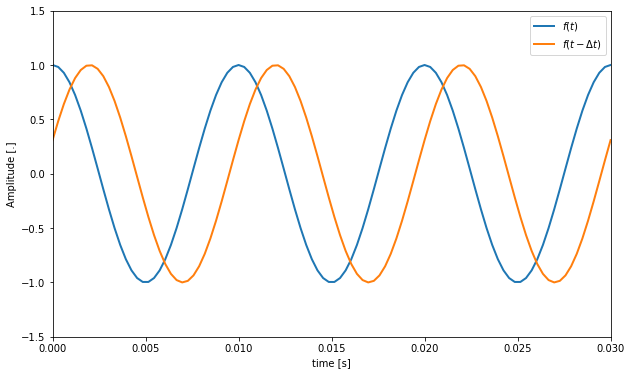

In [90]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

def genSinusoid(amp, freq, initPhase, time):
    return amp*np.cos(2*np.pi*freq*time+initPhase)

nData = 100
endTime = 0.03 # s
time = np.linspace(0,endTime,nData)
amp = 1
freq = 100 # Hz
initPhase = 0 # rad
sinusoid = genSinusoid(amp, freq, initPhase, time)
period = 1/freq # s

timeShift = 0.2*period # s
shiftedSinusoid = genSinusoid(amp, freq, initPhase-2*np.pi*freq*timeShift, time)

# plot the results
plt.figure(figsize=(10,6))
plt.plot(time, sinusoid, linewidth=2, label="$f(t)$")
plt.plot(time, shiftedSinusoid, linewidth=2, label="$f(t-\Delta t)$"), plt.legend()
plt.xlim((time[0],time[nData-1])), plt.ylim((-1.5,1.5))
plt.xlabel('time [s]'), plt.ylabel('Amplitude [.]');

3. if the function repeats itself for every period $D$ is must also repeat itself for a period of $2D$ or, in general, $kD$ where $k=\pm 1, \pm 2, \pm 3, \cdots$ where $k$ is an integer. This can be written as
$$
    f(t) = f(t+kD)\ .
$$
4. The frequency
$$
    f_k = \frac{1}{kD}\quad\text{[Hz]} 
$$
is called the $k$'th **harmonic frequency** or **mode** of the periodic signal. Note that
$$
    f_k = k f_0
$$
and that the first harmonic frequency $f_1$ is also the same as the fundamental frequency $f_0$.

5. Every periodic function can be written as a weighted sum of sinusoids with frequencies $f_k=kf_0$ for $k= 1, 2, 3, \cdots$. This can be written as
\begin{align}
    f(t) &= \sum_{k=1}^{\infty} f_k(t) = \sum_{k=1}^{\infty} A_k\cos(k\Omega_0 t + \psi_k)\\
    &= \mathrm{Re}\left[\sum_{k=1}^{\infty}A_k\mathrm{e}^{j\psi_k}\mathrm{e}^{jk\Omega_0 t}\right]
\end{align}
where $A_k$ and $\psi_k$ are the amplitude and initial phase of $k$'th **harmonic component** $f_k(t)$, respectively, and $\Omega_0=2\pi f_0$.
6. A periodic function written as a sum of harmonic components is called a **Fourier series representation** of $f(t)$ and is very important in audio processing (we return to this later in the course).

### Example: Guitar
<br />
<center>
<img src="figures/guitarSketch.png" alt="Guitar sketch" width="70%" />
</center>

A guitar string is fixed to 0 at both ends, but the guitarist has control of the string length $L$. This means that the guitar string must vibrate according to 
$$
    y(x,t) = f(t-x/c)-f(t+x/c-D) 
$$
where $f(t)$ is a **periodic function** with fundamental frequency (or pitch)
$$
    f_0 = \frac{1}{D} = \frac{c}{2L} = \frac{1}{2L}\sqrt{\frac{T}{\rho}}\quad{\text{[Hz]}}
$$
where $T$ and $\rho$ are the tension and linear density of the string, respectively.

Since $f(t)$ is periodic in $D$, we can also write $y(x,t)$ as
$$
    y(x,t) = f(t-x/c)-f(t+x/c)\ .
$$

Now, let us insert the Fourier series representation of the periodic function $f(t)$ into the solution. We get
\begin{align}
    y(x,t) &= f(t-x/c)-f(t+x/c)\\
    &= \sum_{k=1}^{\infty} A_k\cos(k\Omega_0 (t-x/c) + \psi_k) - \sum_{k=1}^{\infty} A_k\cos(k\Omega_0 (t+x/c) + \psi_k)\\
    &= \sum_{k=1}^{\infty} A_k\left[\cos(k\Omega_0 t + \psi_k - k\Omega_0x/c)-\cos(k\Omega_0 t + \psi_k + k\Omega_0x/c)\right]\\
    &= 2\sum_{k=1}^{\infty} A_k \sin(k\Omega_0 t + \psi_k)\sin(k\Omega_0x/c)
\end{align}
where the last equality follow from the trigonometric indentity
$$
    \cos(\theta-\phi)-\cos(\theta+\phi) = 2\sin(\theta)\sin(\phi)\ .
$$

Since $\Omega_0 = 2\pi f_0 = \pi c/L$, our final result is
$$
    y(x,t) = 2\sum_{k=1}^{\infty} A_k \sin(k\pi c t/L + \psi_k)\sin(k\pi x/L)
$$
which is often also written as
$$
    y(x,t) = 2\sum_{k=1}^{\infty} \left[a_k \sin(k\pi c t/L)+ b_k \cos(k\pi c t/L)\right]\sin(k\pi x/L)
$$
where
\begin{align}
    a_k &= A_k\cos(\psi_k)\\
    b_k &= A_k\sin(\psi_k)\ .
\end{align}
The values of $a_k$ and $b_k$ (or $A_k$ and $\psi_k$) are determined by the initial conditions $y(x,0)$, i.e., how the string was plucked (we will not cover this here).

#### Example: Ideal vibration of a plucked guitar string
Let us look at an example of the vibrations of a guitar string with initial and boundary conditions as shown in the figure below.
- **Boundary conditions**: both ends of the guitar string are fixed to zero. Thus, the boundary conditions are
$$
    y(0,t) = y(L,t) = 0\ .
$$
- **Initial conditions**: the string is deflected by $\delta$ at position $P$ at time 0 and forms a triangle together with the interval from $0$ to $L$ on the $x$-axis.
<center>
<img src="figures/initialConditionsString.png" alt="Initial conditions for a string" width="70%" />
</center>

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as ani
import scipy.io.wavfile as wave
plt.rcParams["animation.html"] = "jshtml" # enable interactive animation

def computeStringHeight(time, pos, propSpeed, length, pluckPos, pluckAmp, nHarmonics):
    '''Compute the height of a string at a given time and position for a triangular initial condition'''
    nPos = np.size(pos)
    pitch = propSpeed/(2*length) # Hz
    harmIdx = np.arange(0,nHarmonics)+1
    initPhases = np.pi*pluckPos*harmIdx
    amps = pluckAmp*np.sin(initPhases)/(pluckPos*(1-pluckPos)*np.pi**2*harmIdx**2)
    stringHeight = np.zeros((np.shape(pos)))
    for kHarm in harmIdx:
        stringHeight = stringHeight + \
            2*amps[kHarm-1]*np.cos(2*np.pi*kHarm*pitch*time)* \
            np.sin(2*np.pi*kHarm*pitch*pos/propSpeed)
    return stringHeight

def initAnimation():
    line.set_data([], [])
    return (line,)

def animateStringHeight(iFrame, nPos, propSpeed, length, pluckPos, pluckAmp, nHarmonics):
    '''Animate the string height of an ideal string fixed at one end'''
    timeStep = 0.0001 # s
    time = iFrame*timeStep
    pos = np.linspace(0,length,nPos)
    stringHeight = computeStringHeight(time, pos, propSpeed, length, pluckPos, pluckAmp, nHarmonics)
    line.set_data(pos, stringHeight)
    return (line,)

In [2]:
# specify string parameters
tension = 72 # N
density = 0.004 # kg/m
propSpeed = np.sqrt(tension/density) # m/s
length = 0.6 # m
nPos = 100
pluckPos = 0.2 # must be between 0 and 1
pluckAmp = 0.01 # m
nHarmonics = 15 # the higher the more accurate, but slower

# initialise plots
fig, ax = plt.subplots()
ax.set_xlim((0,length))
ax.set_ylim((-3*pluckAmp, 3*pluckAmp))
ax.set_xlabel('position [m]')
ax.set_ylabel('height [m]')
line, = ax.plot([], [], linewidth=2)
plt.close() # avoid an empty plot in the output

# make animation
anim = ani.FuncAnimation(fig, animateStringHeight,\
    fargs=(nPos, propSpeed, length, pluckPos, pluckAmp, nHarmonics), init_func=initAnimation, \
    frames=250, interval=150, blit=True)
anim

harmIdx = np.arange(0,nHarmonics)+1
initPhases = np.pi*pluckPos*harmIdx
amps = 2*pluckAmp*np.sin(initPhases)/(pluckPos*(1-pluckPos)*np.pi**2*harmIdx**2)
pitch = propSpeed/(2*length)

# plot the harmonic amplitudes
plt.figure(figsize=(10,6))
plt.stem(harmIdx*pitch, np.abs(amps))
plt.yscale('log')
plt.xlim((0,nHarmonics*pitch))
plt.ylim((5e-5,2e-2))
plt.xlabel('frequency [Hz]')
plt.ylabel('Amplitude [.]');

#### Example: Recording of real guitar string
Now let us see how well our ideal model of the guitar predicts the actual sound produced by a guitar. The model predicts that
- the guitar signal will be periodic
 - **time**: a plot of the guitar signal should reveal that the signal repeats itself every time period $D$
 - **frequency**: the energy of the harmonic components should be concentrated at the frequencies $k f_0$ for $k=1,2,3,\cdots$ where $f_0$ is the fundamental frequency
- the fundamental frequency $f_0$ is related to the string length $L$, tension $T$, and linear density $\rho$ as
$$
    f_0 = \frac{1}{2L}\sqrt{\frac{T}{\rho}}\quad{\text{[Hz]}}\ .
$$
In this example, a B3 note is recorded which corresponds to $f_0 = 246.94$ Hz. For a traditional guitar, five strings can produce this frequency (fret 0/open, 4, 9, 14, and 19 for string 2, 3, 4, 5, and 6 (thickest), respectively).

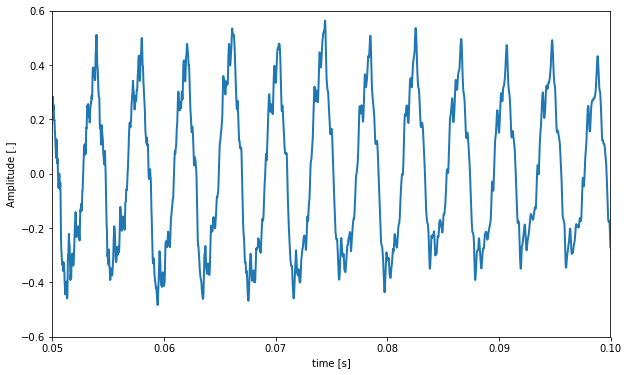

In [20]:
# load a guitar signal
samplingFreq, fullGuitarSignal = wave.read('data/guitar.ff.sulB.B3.wav')
fullGuitarSignal = fullGuitarSignal/2**15 # normalise
# extract a segment
tStart = 0.05 # s
tEnd = 0.1 #
startIdx = np.int(tStart*samplingFreq)
endIdx = np.int(tEnd*samplingFreq)
time = np.arange(startIdx,endIdx)/samplingFreq
nData = np.size(time)
dataSegment = fullGuitarSignal[startIdx:endIdx]

# plot the data segment
plt.figure(figsize=(10,6))
plt.plot(time,dataSegment,linewidth=2)
plt.xlim((time[0],time[nData-1]))
plt.ylim((-0.6,0.6))
plt.xlabel('time [s]')
plt.ylabel('Amplitude [.]');

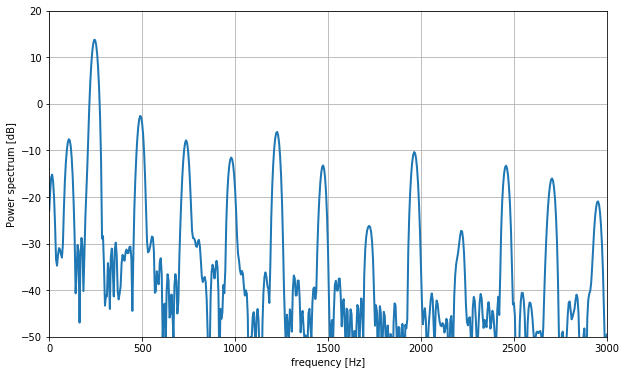

In [14]:
# compute the frequency spectrum
nDft = 4*2096 # number of points in the spectrum
window = np.hamming(nData)
ampSpectrum = np.abs(np.fft.fft(window*dataSegment,nDft))**2/nData
freqVector = samplingFreq*np.arange(0,nDft)/nDft

# plot the frequency segment
plt.figure(figsize=(10,6))
plt.plot(freqVector,10*np.log10(ampSpectrum),linewidth=2)
plt.xlim((freqVector[0],freqVector[nDft-1]))
plt.xlim((0,3000))
plt.ylim((-50,20))
plt.xlabel('frequency [Hz]')
plt.ylabel('Power spectrum [dB]');
plt.grid(True)

### Summary
1. When a string of length $L$ is fixed to zero at both ends, the general solution to the wave equation is
$$
    y(x,t) = f(t-x/c)-f(t+x/c)
$$
where $f(t)$ is a **periodic function**.
2. Any periodic function can be written as a sum of sinusoids, i.e.,
\begin{align}
    f(t) &= \sum_{k=1}^{\infty} A_k\cos(k\Omega_0 t + \psi_k) = \mathrm{Re}\left[\sum_{k=1}^{\infty}A_k\mathrm{e}^{j\psi_k}\mathrm{e}^{jk\Omega_0 t}\right]
\end{align}
where
 - $A_k\geq 0$ is the **amplitude** of the $k$'th harmonic
 - $\psi_k\in[0,2\pi)0$ is the **initial phase** of the $k$'th harmonic
 - $f_0 > 0$ is the **fundamental frequency** or **pitch** with $\Omega_0 = 2\pi f_0$ .
3. Inserting the **Fourier series expansion** frpm point 2. in the solution in point 1. gives
$$
    y(x,t) = 2\sum_{k=1}^{\infty} \left[a_k \sin(k\pi c t/L)+ b_k \cos(k\pi c t/L)\right]\sin(k\pi x/L)
$$
where $a_k = A_k\cos(\psi_k)$ and $b_k = A_k\sin(\psi_k)$. The values of $a_k$ and $b_k$ (or $A_k$ and $\psi_k$) are determined by the initial conditions $y(x,0)$, i.e., how the string was plucked.

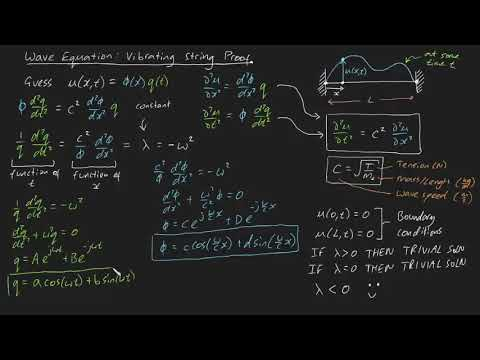

In [1]:
# Bonus: An alternative way of deriving the solution to the wave equation for a guitar string
from IPython.display import display, YouTubeVideo, Image
YouTubeVideo('WtHAylAGvLw')